<a href="https://colab.research.google.com/github/factorLee/DeepLearningfromScratch01_PKNU/blob/main/AI11_lecture.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 단순 신경방 기울기 구하기

In [ ]:
import numpy as np
from functions import softmax, cross_entropy_error
from gradient import numerical_gradient

In [ ]:
# 인공신경망(1층짜리) 클래스 생성
class simpleNet:
    def __init__(self):
        self.W = np.random.rand(2,3)

    def predict(self, x): # 어떤 입력값 x
        return np.dot(x, self.W) # np.dot => x랑 self.W랑 곱해라
    
    def loss(self, x, y): # 교과서와 다르게 y라는 걸 실제 정답으로 사용
        z = self.predict(x) # 중간에 계산된 z 값
        y_pred = softmax(z) # z값을 softmax 함수에 넣어 y_pred라는 예상되는 y값을 구함
        loss = cross_entropy_error(y_pred, y)
        return loss



In [ ]:
# 객체 생성
net = simpleNet()
print(net.W)

[[0.30284263 0.88802753 0.83908656]
 [0.74822282 0.26799269 0.66539548]]


In [ ]:
x = np.array([0.6,0.9])
y = np.array([0,0,1])

net.loss(x,y)

0.916743001543277

In [ ]:
# 기울기 구하기
def f(W):
    return net.loss(x,y)

numerical_gradient(f, net.W) # 기울기가 된다.


array([[ 0.1873511 ,  0.17275739, -0.36010849],
       [ 0.28102665,  0.25913608, -0.54016274]])

In [ ]:
# 람다식
f = lambda W: net.loss(x,y)
numerical_gradient(f,net.W)

array([[ 0.1873511 ,  0.17275739, -0.36010849],
       [ 0.28102665,  0.25913608, -0.54016274]])

## 2층 신경망

In [ ]:
from functions import *
from gradient import numerical_gradient

class TwoLayerNet:
    #패러미터 초기화
    def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std*np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)

    # 신경망 연산
    def predict(self, x):
        W1 = self.params['W1']
        b1 = self.params['b1']
        W2 = self.params['W2']
        b2 = self.params['b2']

        a1 = np.dot(x,W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1,W2) + b2
        y = softmax(a2)

        return y

    # loss값 계산
    def loss(self,x,y):
        y_pred = self.predict(x)
        return cross_entropy_error(y_pred,y)

    # 정확도 계산
    def accuracy(self,x,y):
        y_pred = self.predict(x)
        y_pred_label = np.argmax(y_pred,axis = 1)
        y_label = np.argmax(y, axis=1)

        accuracy = np.sum(y_pred_label == y_label)/float(x.shape[0])
        return accuracy

    # 현재 패러미터의 기울기
    def numerical_gradient(self,x,y):
        loss_W = lambda W: self.loss(x,y)

        grads={}
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])

        return grads

In [ ]:
# 실제 계산
net = TwoLayerNet(input_size=784,hidden_size=100,output_size=10)
x = np.random.rand(100,784)
y_pred = net.predict(x)


In [ ]:
x = np.random.rand(100,784)
y = np.random.rand(100,10)
grads = net.numerical_gradient(x,y)


In [ ]:
grads['W1'] # 모든 패러미너에 대해서 기울기가 계산된다.

array([[-1.43319712e-05,  4.66154582e-05, -1.61888367e-04, ...,
         2.64553814e-04,  1.82145188e-06,  6.84304768e-05],
       [ 1.54147828e-05,  7.33294514e-05, -5.71570991e-05, ...,
         1.53555100e-04,  1.70616654e-05,  7.88972598e-05],
       [ 8.16245715e-05, -8.90501806e-05, -1.78982020e-04, ...,
         1.66843781e-04, -1.21993682e-05,  7.20978055e-05],
       ...,
       [-2.93346436e-05,  1.50457469e-05, -1.15826138e-04, ...,
         2.20213479e-04,  5.86307736e-05,  1.02015083e-04],
       [-5.89241367e-05,  6.75715950e-05, -9.88260385e-05, ...,
         3.43747280e-04,  3.25031446e-05,  2.85164048e-05],
       [ 5.12076093e-05,  2.62833888e-05, -2.16167999e-04, ...,
         2.37435289e-04, -3.61289709e-05,  7.41697881e-05]])

## 2층 신경망 학습하기(미니배치 학습 구현)

In [ ]:
import numpy as np
from mnist import load_mnist
from two_layer_net import TwoLayerNet

(x_train,y_train),(x_test,y_test) = load_mnist(normalize = True, one_hot_label = True)
train_loss_list=[]

iter_num = 10000
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.1

network = TwoLayerNet(input_size=784,hidden_size=50, output_size=10)
for i in range(iter_num):
    batch_mask = np.random.choice(train_size,batch_size)
    x_batch = x_train[batch_mask]
    y_batch = y_train[batch_mask]

    grad = network.gradient(x_batch, y_batch)
    #grad = network.numerical_gradient(x_batch, y_batch)
    for key in ('W1','b1', 'W2', 'b2'):
        network.params[key] -= learning_rate*grad[key]

        loss = network.loss(x_batch, y_batch)
        train_loss_list.append(loss)

Converting train-images-idx3-ubyte.gz to NumPy Array ...
Done
Converting train-labels-idx1-ubyte.gz to NumPy Array ...
Done
Converting t10k-images-idx3-ubyte.gz to NumPy Array ...
Done
Converting t10k-labels-idx1-ubyte.gz to NumPy Array ...
Done
Creating pickle file ...
Done!


In [ ]:
x_train.shape

(60000, 784)

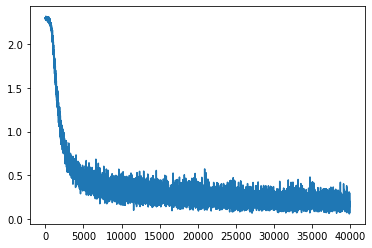

In [ ]:
import matplotlib.pyplot as plt
plt.plot(train_loss_list)

## 2층신경망 학습하고, 테스팅 데이터로 정확도 확인

In [ ]:
 (x_train,y_train),(x_test,y_test) = load_mnist(normalize=True,one_hot_label=True)
 train_loss_list=[]
 train_acc_list=[]
 test_acc_list=[]

 iter_per_epoch=max(train_size/batch_size,1)

 iter_num = 10000
 train_size = x_train.shape[0]
 batch_size = 100
 learning_rate = 0.1

 network = TwoLayerNet(input_size=784,hidden_size=50,output_size=10)
 for i in range(iter_num):
     batch_mask = np.random.choice(train_size,batch_size)
     x_batch = x_train[batch_mask]
     y_batch = y_train[batch_mask]

     grad = network.gradient(x_batch,y_batch)
     for key in ('W1','b1','W2','b2'):
         network.params[key] -= learning_rate*grad[key]

     loss = network.loss(x_batch,y_batch)
     train_loss_list.append(loss)

     if i%iter_per_epoch == 0:
        train_acc = network.accuracy(x_train,y_train)
        test_acc = network.accuracy(x_test,y_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print(f'train acc: {train_acc}, test acc:{test_acc}')


train acc: 0.0993, test acc:0.1032
train acc: 0.78425, test acc:0.7907
train acc: 0.8774833333333333, test acc:0.8797
train acc: 0.8972666666666667, test acc:0.9
train acc: 0.9071333333333333, test acc:0.91
train acc: 0.9128166666666667, test acc:0.9151
train acc: 0.9194, test acc:0.9204
train acc: 0.92385, test acc:0.9236
train acc: 0.9267833333333333, test acc:0.9273
train acc: 0.9314, test acc:0.9295
train acc: 0.9332333333333334, test acc:0.9324
train acc: 0.9359166666666666, test acc:0.9359
train acc: 0.9375333333333333, test acc:0.9363
train acc: 0.9405666666666667, test acc:0.9396
train acc: 0.9427333333333333, test acc:0.9417
train acc: 0.9449, test acc:0.9435
train acc: 0.94715, test acc:0.9453


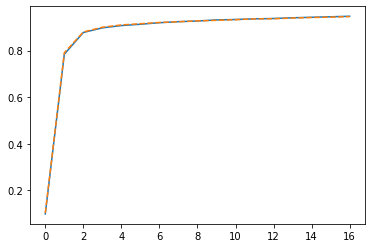

In [ ]:
plt.plot(train_acc_list,'-')
plt.plot(test_acc_list,'--')
